## Step 1. Initial Title, Header, and Imports


# Branton Dawson: Exploratory Data Analysis Project

    Author: Branton Dawson
    Repository: datafun-04-eda
    Date: 05-29-2025

- **Structure:** The notebook is organized into logical steps, starting from data loading, inspection, cleaning, transformation, visualization, and ending with insights. This helps guide the reader through the EDA process.

Import Section:
1. pandas as pd
2. seaborn as sns
3. matplotlib as plt
4. from matplotlib.axes import Axes


In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
print("Starting out with Jupyter.")

Starting out with Jupyter.


## Step 2. Load Data

#### Load the Iris dataset into pandas and inspect the first few rows of the DataFrame

In [30]:
# Load the Iris dataset into pandas DataFrame
iris_df: pd.DataFrame = sns.load_dataset('iris')

# List column names
iris_df.columns

# Inspect first few rows of the DataFrame
iris_df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Step 3. Initial Data Inspection
##### Check dataset's format, size, and the type of information in each column.

In [31]:
# Specify the number of rows to display
iris_df.head(10)

# Inspect the shape of the DataFrame with shape attribute
# The shape is a tuple with count of rows and columns in the DataFrame
iris_df.shape

# Inspect the data types of the columns with dtypes attribute
# The data types are returned as a pandas Series
iris_df.dtypes

# Inspect the data types of the columns with info() method
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Step 4. Initial Descriptive Statistics
#### Look at a statistical summary to show the distribution and central tendencies of the data.

In [32]:
# Inspect summary statistics for numerical columns
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Step 5a. Initial Data Distribution for Numerical Columns
#### Histogram of sepal length

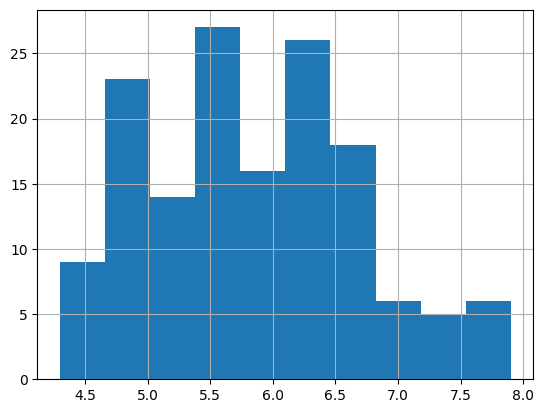

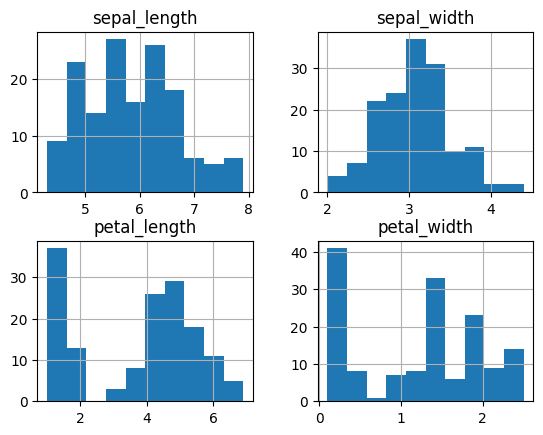

In [33]:
# Inspect histogram by one numerical column
import matplotlib


iris_df['sepal_length'].hist()

# Inspect histograms for ALL numerical columns
iris_df.hist()

# Show all plots
matplotlib.pyplot.show()

1. Sepal length and width appear to have a normal distribution
2. Petal length and width looks to have some abnormal distribution or missing data
3. Had to add import matplotlib in 5a above.

## Step 5b. Initial Data Distribution for Categorical Columns
#### Show a count of unique values in the column

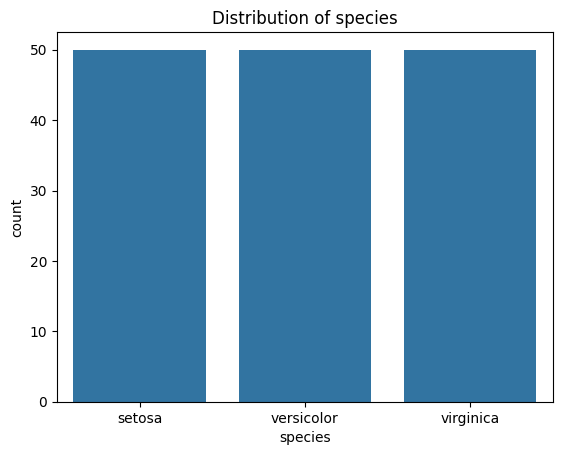

In [34]:
# Inspect value counts by categorical column
# Column name must be EXACT.
# The value_counts() method is only available for Series objects.
# The value_counts() method returns a pandas Series with the counts of unique values in the column.
iris_df['species'].value_counts()

# Inspect value counts for ALL categorical columns
for col in iris_df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=iris_df)
    matplotlib.pyplot.title(f'Distribution of {col}')
    matplotlib.pyplot.show()

# Show all plots
matplotlib.pyplot.show()

#### The distribution of each species is each at 50 per species.

## Step 6. Initial Data Transformation and Feature Engineering
#### Used pandas to clean and transform data
#### Added sepal area and petal area columns

In [35]:
# 1. Check for missing values
print("Missing values per column:\n", iris_df.isnull().sum())

# 2. Drop rows with missing values (if any)
iris_df = iris_df.dropna()

# 3. Standardize column names (lowercase, replace spaces with underscores)
iris_df.columns = iris_df.columns.str.lower().str.replace(' ', '_')

# 4. Remove duplicate rows (if any)
iris_df = iris_df.drop_duplicates()

# 5. Convert categorical columns to category dtype for efficiency
for col in iris_df.select_dtypes(include='object').columns:
    iris_df[col] = iris_df[col].astype('category')

# 6. Feature Engineering: Add new features if not already present
if 'sepal_area' not in iris_df.columns:
    iris_df['sepal_area'] = iris_df['sepal_length'] * iris_df['sepal_width']
if 'petal_area' not in iris_df.columns:
    iris_df['petal_area'] = iris_df['petal_length'] * iris_df['petal_width']

# 7. Display cleaned and transformed DataFrame info
iris_df.info()
iris_df.head()

Missing values per column:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  149 non-null    float64 
 1   sepal_width   149 non-null    float64 
 2   petal_length  149 non-null    float64 
 3   petal_width   149 non-null    float64 
 4   species       149 non-null    category
 5   sepal_area    149 non-null    float64 
 6   petal_area    149 non-null    float64 
dtypes: category(1), float64(6)
memory usage: 8.4 KB


,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
0,5.1,3.5,1.4,0.2,setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,setosa,18.00,0.28


## Step 7. Initial Visualizations
####   * Used matplotlib to show pairplot's.  
####   * Added a scatter plot to show two numerical variable.

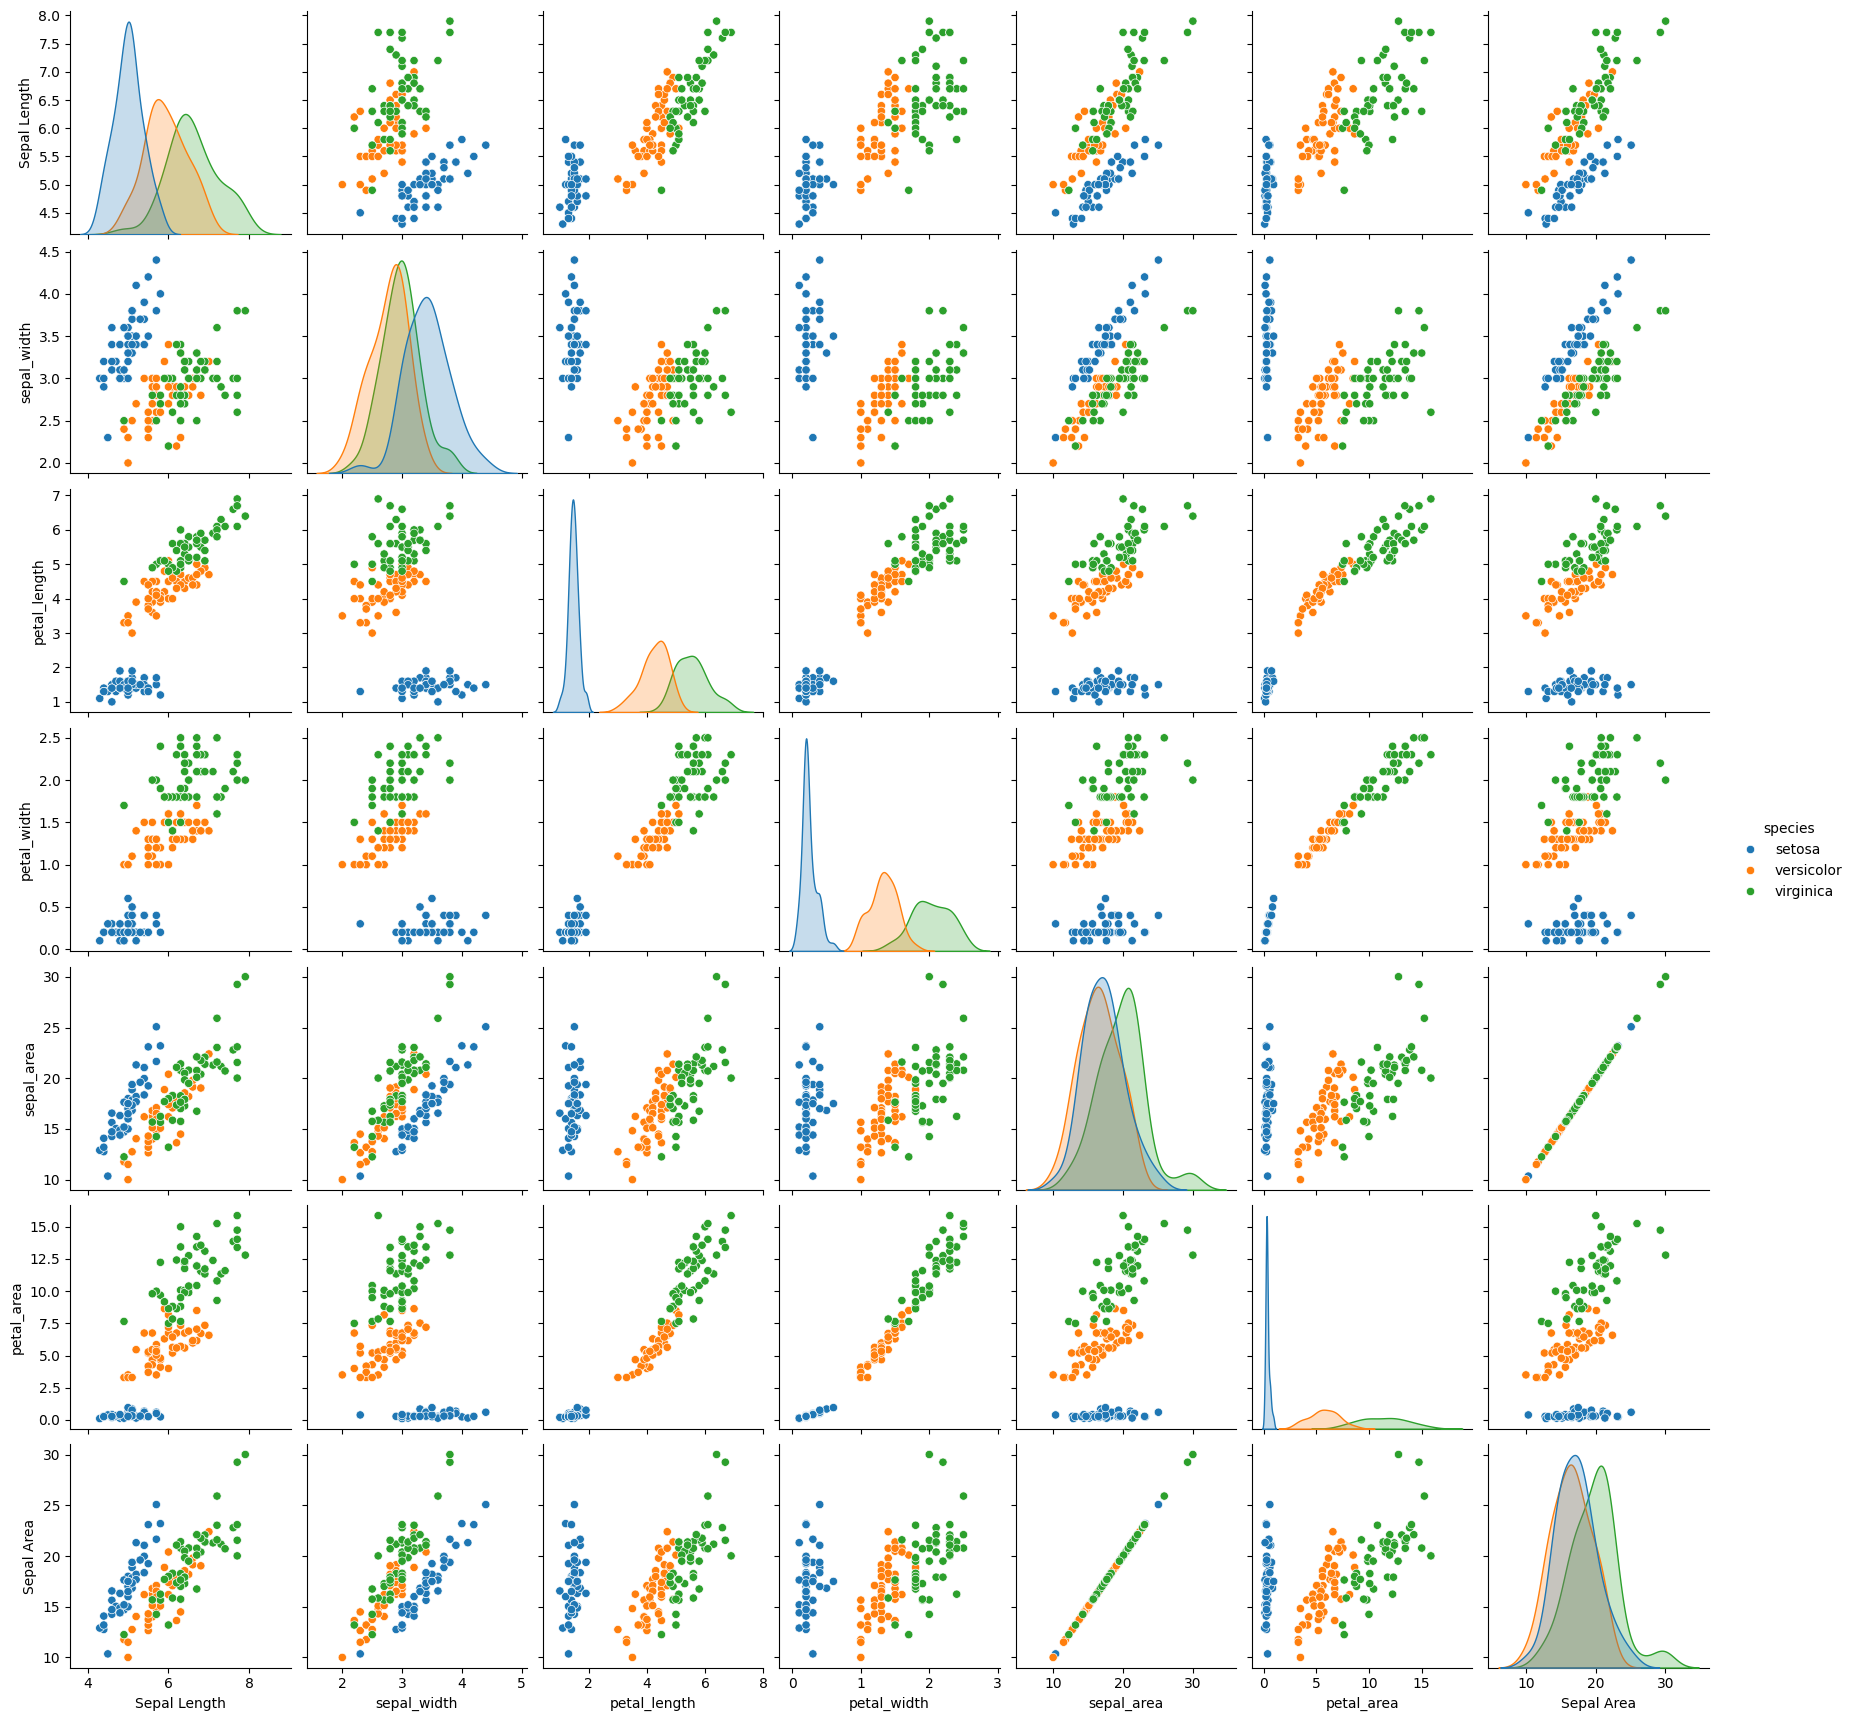

In [36]:
# Feature Engineering
# Renaming a column
iris_df.rename(columns={'sepal_length': 'Sepal Length'}, inplace=True)

# Adding a new column
iris_df['Sepal Area'] = iris_df['Sepal Length'] * iris_df['sepal_width']

# Create a pairplot of the Iris dataset
# A pairplot is a grid of scatter plots for each pair of numerical columns in the dataset
# The hue parameter is used to color the data points 
# by species (a categorical column)
sns.pairplot(iris_df, hue='species')

# Show all plots
matplotlib.pyplot.show()

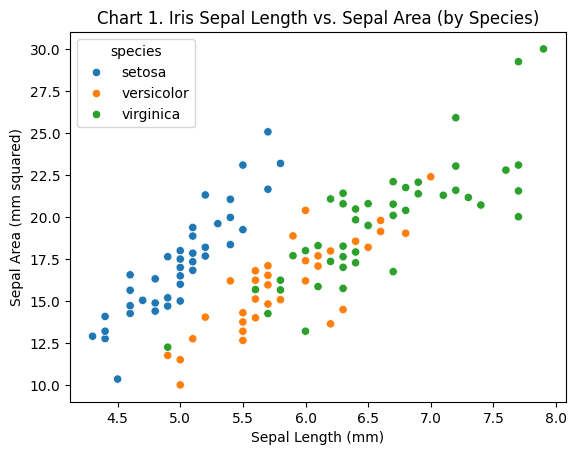

In [37]:
# A scatter plot is a plot of two numerical variables.
scatter_plt: Axes = sns.scatterplot(
    data=iris_df, x="Sepal Length", y="Sepal Area", hue="species"
)

# Set axis labels using the Matplotlib Axes methods set_xlabel() and set_ylabel()
scatter_plt.set_xlabel("Sepal Length (mm)")
scatter_plt.set_ylabel("Sepal Area (mm squared)")   

# Set the title using the Matplotlib Axes set_title() method
scatter_plt.set_title("Chart 1. Iris Sepal Length vs. Sepal Area (by Species)")

matplotlib.pyplot.show()

## Step 8. Initial Insights

- **No Missing Data:** The Iris dataset contains no missing values, so no imputation was necessary.
- **No Duplicates:** There were no duplicate rows after cleaning.
- **Balanced Classes:** Each species (setosa, versicolor, virginica) is equally represented with 50 samples each.
- **Numeric Distributions:** Sepal length and width are approximately normally distributed, while petal length and width show more variation and separation between species.
- **Feature Engineering:** New features `sepal_area` and `petal_area` were created, which may help in distinguishing between species.
- **Relationships:** Pairplots and scatter plots show clear separation between species, especially in petal measurements. Setosa is easily separable from the other two species.
- **Categorical Optimization:** The `species` column was converted to a categorical type for efficiency.
- **Potential for Classification:** The clear separation in feature space suggests that simple classification models could perform well on this dataset.


## Step 9. Annotate Your Notebook for Storytelling and Presentation
---

### Notebook Checklist

- [x] Exactly one Markdown title (with a single hash)
- [x] Useful Markdown header cell with author, purpose, and optionally, the date
- [x] Numbered second-level Markdown headings for organization
- [x] Numbered sections with useful content for:
    1. Imports
    2. Load Data
    3. Initial Data Inspection
    4. Initial Descriptive Statistics
    5. Initial Data Distribution for Numerical Columns
    6. Initial Data Transformation and Feature Engineering
    7. Initial Visualizations
    8. Initial Insights
- [x] Commentary throughout that tells a unique data story
- [x] Unique insights into the dataset
- [x] Code and visuals are working, notebook is fully executed and viewable on GitHub

---